# Анализ продажи компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

* Name — название игры;
* Platform — платформа;
* Year_of_Release — год выпуска;
* Genre — жанр игры;
* NA_sales — продажи в Северной Америке (миллионы проданных копий);
* EU_sales — продажи в Европе (миллионы проданных копий);
* JP_sales — продажи в Японии (миллионы проданных копий);
* Other_sales — продажи в других странах (миллионы проданных копий);
* Critic_Score — оценка критиков (максимум 100);
* User_Score — оценка пользователей (максимум 10);
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import binom, poisson, norm
from math import sqrt, factorial
import re

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [9]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [10]:
# Просмотрим общую информацию о dataframe и 15 рандомных строк

display(df.info())
display(df.sample(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Name Platform  \
15454                        Chevrolet Camaro: Wild Ride       DS   
11547                                         Tempest 3X       PS   
2024                                            NBA 2K17     XOne   
1373                      NASCAR 2005: Chase for the Cup      PS2   
16697                                   Bust-A-Move 3000       GC   
14735                         Wrestle Angels: Survivor 2      PS2   
16513  Tennis no Oji-Sama: Doubles no Oji-Sama - Boys...       DS   
6392                             InuYasha: Feudal Combat      PS2   
14442                                  Ojyousama Express      SAT   
3447                  Sammy Sosa High Heat Baseball 2001       PS   
8076                                           Jeopardy!       DS   
8414                                  The Cursed Crusade      PS3   
11997        The Legend of Heroes VII: The Trail of Zero      PSV   
654                                          Tetris Plus       PS   
3240                                       Viewtiful Joe       GC   

       Year_of_Release         Genre  NA_sales  EU_sales  JP_sales  \
15454           2010.0        Racing      0.02      0.00      0.00   
11547           1995.0       Shooter      0.04      0.03      0.00   
2024            2016.0        Sports      0.86      0.06      0.00   
1373            2004.0        Racing      0.69      0.54      0.00   
16697           2003.0        Puzzle      0.01      0.00      0.00   
14735           2008.0      Fighting      0.00      0.00      0.03   
16513           2009.0        Sports      0.00      0.00      0.01   
6392            2005.0      Fighting      0.13      0.10      0.00   
14442           1998.0      Strategy      0.00      0.00      0.03   
3447            2000.0        Sports      0.32      0.22      0.00   
8076            2010.0          Misc      0.17      0.00      0.00   
8414            2011.0        Action      0.07      0.06      0.01   
11997           2012.0  Role-Playing      0.00      0.00      0.07   
654             1996.0        Puzzle      2.10      0.24      0.00   
3240            2003.0        Action      0.38      0.10      0.12   

       Other_sales  Critic_Score User_Score Rating  
15454         0.00           NaN        tbd      E  
11547         0.01           NaN        NaN    NaN  
2024          0.11          90.0        6.2      E  
1373          0.18          87.0        8.4      E  
16697         0.00          53.0        tbd      E  
14735         0.00           NaN        NaN    NaN  
16513         0.00           NaN        NaN    NaN  
6392          0.03          52.0        8.3      T  
14442         0.00           NaN        NaN    NaN  
3447          0.04           NaN        NaN    NaN  
8076          0.01           NaN        NaN    NaN  
8414          0.03          45.0          5      M  
11997         0.00           NaN        NaN    NaN  
654           0.07           NaN        NaN    NaN  
3240          0.02          93.0        8.3      T

**Описание данных:**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Из полученной общей информации можно сделать **промежуточный вывод:**

В столбце Critic_Score, User_Score, Rating присутствует большое количество пропусков. Для столбца с Годом выпуска стоит изменить формат на date. Также оценки критиков можно округлить до целого, а оценку пользователя привести к числовому значению.

### Шаг 2. Подготовьте данные

In [13]:
# Приведем названия к нижнему регистру и сделаем проверку

df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [14]:
# Проверим df на наличие явных дубликатов

print('Количество явных дубликатов:', df.duplicated().sum())

Количество явных дубликатов: 0


In [15]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep = 'last', ignore_index=True)

In [16]:
print(df['name'].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


In [17]:
# Посчитаем пропуски в столбцах

df.isna().sum().sort_values(ascending=False)

critic_score       8577
rating             6765
user_score         6700
year_of_release     269
name                  1
genre                 1
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [18]:
# Рассмотрим две записи с пропусками в названиях в cтолбце Name

df[df['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
14242  NaN      GEN           1993.0   NaN       0.0       0.0      0.03   

       other_sales  critic_score user_score rating  
14242          0.0           NaN        NaN    NaN

**Промежуточный вывод:** 

В полученных строках отсутствует много информации: имя, жанр, рейтинг и оценка. Отсутствующие данные невозможно чем-то заменить, поэтому удалим их

In [20]:
df = df.dropna(subset = ['name'])

In [21]:
# Рассмотрим строки с пропусками в столбце Year of release

df[df['year_of_release'].isna()]

name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
608                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16371  PDC World Championship Darts 2008      PSP              NaN   
16403                      Freaky Flyers       GC              NaN   
16446                          Inversion       PC              NaN   
16456        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16520                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   
377          Sports      0.59      2.36      0.04         0.51          84.0   
456          Action      1.80      0.97      0.00         0.29          74.0   
475        Fighting      1.57      1.02      0.00         0.41           NaN   
608         Shooter      2.36      0.14      0.00         0.03           NaN   
...             ...       ...       ...       ...          ...           ...   
16371        Sports      0.01      0.00      0.00         0.00          43.0   
16403        Racing      0.01      0.00      0.00         0.00          69.0   
16446       Shooter      0.01      0.00      0.00         0.00          59.0   
16456     Adventure      0.01      0.00      0.00         0.00           NaN   
16520  Role-Playing      0.01      0.00      0.00         0.00          55.0   

      user_score rating  
183          8.5      E  
377          6.4      E  
456          7.9   E10+  
475          NaN    NaN  
608          NaN    NaN  
...          ...    ...  
16371        tbd   E10+  
16403        6.5      T  
16446        6.7      M  
16456        NaN    NaN  
16520        5.5      T  

[269 rows x 11 columns]

**Промежуточный вывод:**

В некоторых названиях присутствует год. Скорее всего, это и есть год релиза. Заполним промежутки в столбце года датами из названия. Для этого напишем функцию, которая будет находить год в названии и возвращать нам дату. В функции используем библиотеку re с функцией findall, которая возвращает совпадения заданного шаблона в строке в виде списка

In [23]:
def find_year(name_string, fmt='%Y'):
    find_year = re.findall("(?<!\d)\d{4}(?!\d)", str(name_string))
    if len(find_year):
      year = int(find_year[-1])
      return year

df['year_of_release'] = df['year_of_release'].fillna(df['name'].apply(find_year))

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Евгений\AppData\Local\Temp\ipykernel_612\1202627836.py:2: SyntaxWarning: invalid escape sequence '\d'
  find_year = re.findall("(?<!\d)\d{4}(?!\d)", str(name_string))


In [24]:
# Еще раз посмотрим на количество пропусков

df.isna().sum().sort_values(ascending=False)

critic_score       8576
rating             6764
user_score         6699
year_of_release     252
name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [25]:
# Рассмотрим столбец Оценка пользователя

df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Промежуточный вывод:**

В данном столбце встречаются пропущенные значения NaN, а также абривиатура tbd (перевод "будет решено"). Данное заполнение можно заменить на NaN

In [27]:
df['user_score'] = df['user_score'].replace('tbd', np.NAN)

In [28]:
# Также отсутствующие значения в оставшихся столбцах заменим на -1

#df['year_of_release'] = df['year_of_release'].fillna(-1)
#df['critic_score'] = df['critic_score'].fillna(-1)
#df['user_score'] = df['user_score'].fillna(-1)

In [29]:
# Удалим строки с пропущенными значениями в столбце с годом релиза

df = df.dropna(subset=['year_of_release'])

In [30]:
# Рассмотрим уникальные значения в столбце с рейтингом

df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [31]:
# Заменим пропущенные значения на 'unknown'

df['rating'] = df['rating'].fillna('unknown')

In [32]:
# Все пропуски обработаны

df.isna().sum().sort_values(ascending=False)

user_score         8988
critic_score       8466
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
dtype: int64

In [33]:
# Преобразуем типы данных
# 1. Столбик с годом выпуска приведем к целым числам, тип int

df['year_of_release'] = df['year_of_release'].astype(int)

In [34]:
# 2. Столбик с оценкой пользователей приведем в типу float, а также к 100-бальной шкале, как и другие столбики с оценками

df['user_score'] = df['user_score'].astype('float')
df['user_score'] = df['user_score'] * 10

In [35]:
# Создадим столбик с суммарной продажей во всех регионах

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [36]:
# Рассмотрим названия платформ для игр
# Данная информация поможет далее сделать выводы

df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [37]:
# Посмотрим общую информацию

print(df.info())
display(df.sample(15))

<class 'pandas.core.frame.DataFrame'>
Index: 16460 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  int32  
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     7994 non-null   float64
 9   user_score       7472 non-null   float64
 10  rating           16460 non-null  object 
 11  total_sales      16460 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None


name platform  year_of_release  \
6182                                      Corvette      GBA             2003   
8933     Yu-Gi-Oh! Nightmare Troubadour (US sales)       DS             2005   
10246                          Panzer Dragoon Saga      SAT             1997   
2061                          Game & Watch Gallery       GB             1997   
4234                                    Scooby-Doo      GBA             2001   
9710             All Kamen Rider: Rider Generation       DS             2011   
1735                                         Spore       PC             2008   
1736                           Destruction Derby 2       PS             1996   
4484                            NCAA Football 2004       XB             2003   
11281                Animal Planet: Emergency Vets       DS             2009   
13525                              Virtua Tennis 3     X360             2007   
6547               Army of Two: The Devil's Cartel     X360             2013   
8033   Atelier Shallie: Alchemists of the Dusk Sea      PS3             2014   
12862                  Chuck E. Cheese's Playhouse       DS             2010   
3361                               LEGO The Hobbit      PS4             2014   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
6182         Racing      0.20      0.07      0.00         0.01           NaN   
8933         Action      0.15      0.00      0.00         0.00           NaN   
10246  Role-Playing      0.00      0.00      0.11         0.00           NaN   
2061           Misc      0.63      0.25      0.09         0.03           NaN   
4234       Platform      0.33      0.12      0.00         0.01          64.0   
9710         Action      0.00      0.00      0.12         0.00           NaN   
1735       Strategy      0.03      1.06      0.00         0.08          84.0   
1736         Racing      0.65      0.44      0.00         0.08           NaN   
4484         Sports      0.40      0.02      0.00         0.02          88.0   
11281    Simulation      0.08      0.00      0.00         0.01           NaN   
13525        Sports      0.03      0.01      0.00         0.00          80.0   
6547        Shooter      0.16      0.07      0.00         0.02          54.0   
8033   Role-Playing      0.06      0.02      0.08         0.02          76.0   
12862          Misc      0.05      0.00      0.00         0.00           NaN   
3361         Action      0.13      0.38      0.00         0.09          72.0   

       user_score   rating  total_sales  
6182          NaN        E         0.28  
8933          NaN  unknown         0.15  
10246         NaN  unknown         0.11  
2061          NaN  unknown         1.00  
4234          NaN        E         0.46  
9710          NaN  unknown         0.12  
1735         53.0     E10+         1.17  
1736          NaN  unknown         1.17  
4484         88.0        E         0.44  
11281         NaN        E         0.09  
13525        68.0        E         0.04  
6547         62.0        M         0.25  
8033         77.0     E10+         0.18  
12862         NaN        E         0.05  
3361         66.0     E10+         0.60

**Вывод:**

Были обработаны явные дубликаты. Также удалена пара строк без названия. Мы преобразовали тип данных в столбце с годом к date. Заменили отсутствующие значения в рейтингах и годах на маркерный -1. Привели столбик с оценкой пользователей к 100-бальной системе. А также добавили столбец с суммарной продажей во всех регионах.

### Шаг 3. Исследовательский анализ данных

Напишем функции, которые будет строить графики рапределения, чтобы избежать повторений кода

In [41]:
# Столбчатые диаграммы

def graph_bar(data, yaxes, xlab, ylab, title):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x = data.index, y = yaxes, data = data)
    ax.set(xlabel = xlab, ylabel = ylab, title = title)
    plt.xticks(rotation = 50)
    plt.show()

In [42]:
# Линейные диаграммы

def graph_line(data, xaxes, yaxes, xlab, ylab, title):
    plt.figure(figsize=(10,6))
    ax = sns.lineplot(x = xaxes, y = yaxes, data = data, hue = 'platform')
    ax.set(xlabel = xlab, ylabel = ylab, title = title)
    plt.show()

In [43]:
# Ящик с усами

def graph_box(xaxes, yaxes, xlab, ylab, xlim, title):
    plt.figure(figsize=(10,6))
    ax = sns.boxplot(x = xaxes, y = yaxes)
    ax.set(xlabel = xlab, ylabel = ylab, xlim = xlim, title = title)
    plt.show()

In [44]:
# Корреляция

def graph_scatter(data, platform):
    plt.figure(figsize=(10,6))
    ax = sns.scatterplot(x='total_sales', y='critic_score', data = data, alpha = 0.5, color='red',)
    ax = sns.scatterplot(x='total_sales', y='user_score', data = data, alpha = 0.2, color='blue');
    ax.set(xlabel = 'Продажи (млн. копий)', ylabel = 'Оценки', title = platform)
    plt.show()
    print(f'Корреляция продаж и оценки критиков для платформы "{platform}":',
        round(data['total_sales'].corr(data['critic_score']),3))
    print(f'Корреляция продаж и оценки пользователей для платформы "{platform}":',
        round(data['total_sales'].corr(data['user_score']),3))
    

In [45]:
# Круговая диаграмма

def graph_pie(data, title):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))
    palette = sns.color_palette('pastel')[ 0:5 ]
    fig.suptitle(title)
    ax1.pie(data['na_sales'], labels = data.index, autopct='%1.1f%%', colors = palette, normalize=True)
    ax1.set_title('Северная Америка')
    ax2.pie(data['eu_sales'], labels = data.index, autopct='%1.1f%%', colors = palette, normalize=True)
    ax2.set_title('Европа')
    ax3.pie(data['jp_sales'], labels = data.index, autopct='%1.1f%%', colors = palette, normalize=True)
    ax3.set_title('Япония')
    ax4.pie(data['other_sales'], labels = data.index, autopct='%1.1f%%', colors = palette, normalize=True)
    ax4.set_title('Другие регионы')
    fig.tight_layout()

#### Сколько игр выпускалось в разные годы

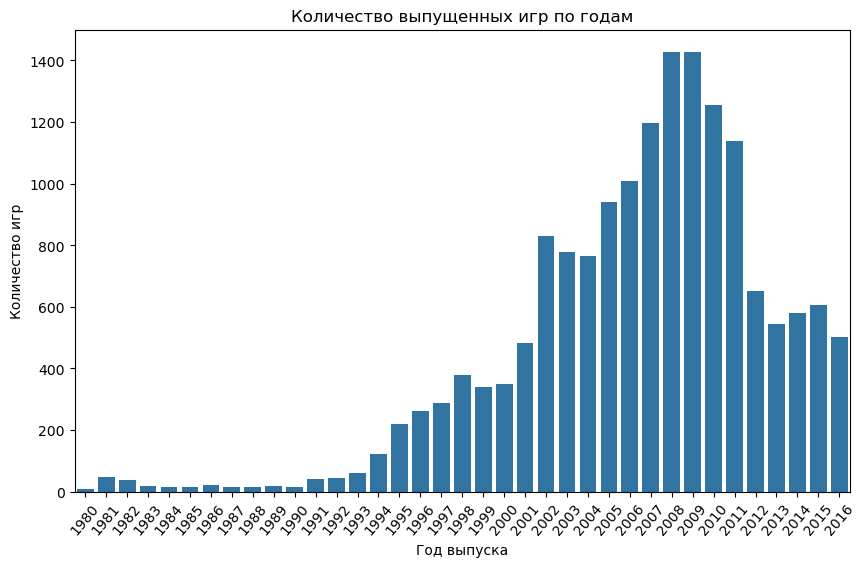

In [47]:
games_years = df[df['year_of_release'] > 0].pivot_table(index = 'year_of_release',
        values = 'name', aggfunc = 'count').sort_values('year_of_release', ascending = False)
graph_bar(games_years, 'name', 'Год выпуска', 'Количество игр', 'Количество выпущенных игр по годам')

**Промежуточный вывод:**

Начиная с 80х годов по 90-е начиналась игровая эпоха первого поколения приставок. Так как она только зараждалась, продажи были невелеки. С 1993 года продажи начинают набирать обороты, так как появились Sega, PlayStation и Nintendo. Далее эти приставки улучшались, игровая индустрия набирала обороты, также появились новые консоли. С 2011 начался спад. Скорее всего, это произошло из-за появления телефонов и планшетов, а также из-за дороговизны разработки игр.

#### Изменение продаж по платформам

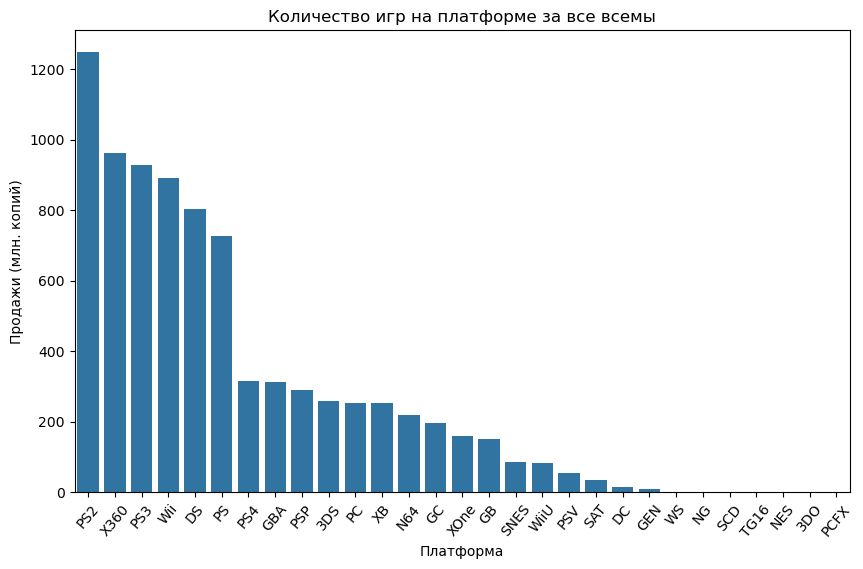

In [50]:
platform_sales=df[df['year_of_release'] >= 1994].pivot_table(index = 'platform',
      values ='total_sales', aggfunc = 'sum').sort_values('total_sales', ascending=False)
graph_bar(platform_sales, 'total_sales', 'Платформа', 'Продажи (млн. копий)', 'Количество игр на платформе за все всемы')

**Промежуточный вывод:**

Максимальные продажи у PlayStation 2, Xbox 360, PlayStation 3, Wii, Nintendo DS и PlayStation 1. Исходя из графика выше рассмотрим лидеров продаж, начиная с 1994 года

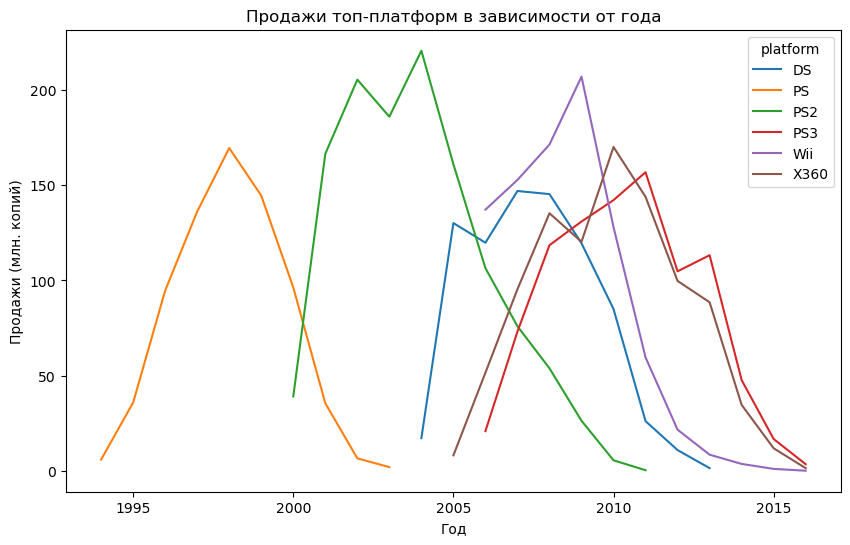

In [52]:
platform_top = platform_sales.head(6).index.tolist()

platform_top_sales = df[(df['platform'].isin(platform_top)) & (df['year_of_release'] >= 1994)].pivot_table(
    index = ['platform','year_of_release'], 
    values = 'total_sales', 
    aggfunc = 'sum').reset_index()

graph_line(platform_top_sales, 'year_of_release', 'total_sales', 'Год',
           'Продажи (млн. копий)', 'Продажи топ-платформ в зависимости от года')

**Промежуточный вывод:**

Каждая платформа продавалась около 10 лет. Максимальный спрос был на PlayStation2

#### Рост, спад и лидерство по продажам

Изходя из динамичности рынка, рассмотрим рынок с 2014 по 2017 год - это и будет актуальный период

**Комментарий:** В описании исправила период с 2006 на 2014 год. Ниже рассматриваю данные за 3 года

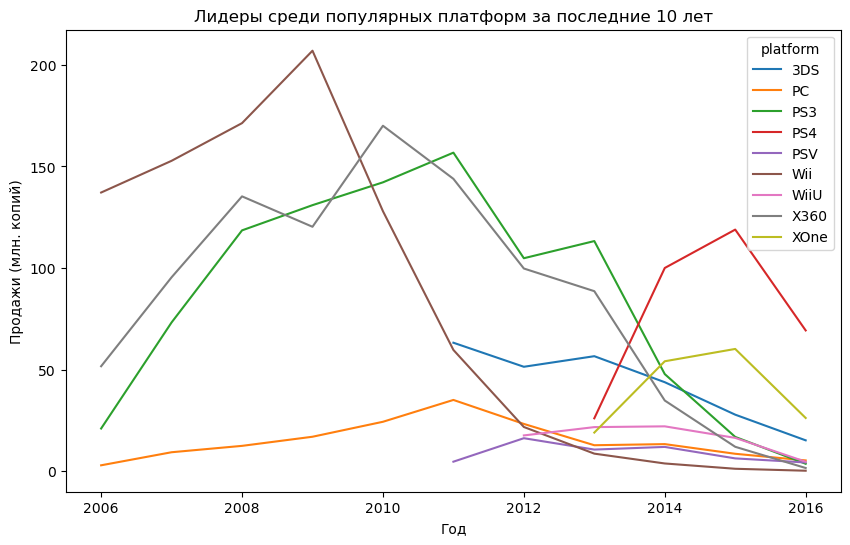

In [56]:

list_actual_platform = df[(df['year_of_release'] >= 2016)].pivot_table(
    index = ['platform'],
    values = 'total_sales', 
    aggfunc = 'sum').sort_values('total_sales', ascending=False).head(10).index.tolist()

platform_trends = df[(df['platform'].isin(list_actual_platform)) & 
                     (df['year_of_release'] >= 2006)].pivot_table(
    index = ['platform','year_of_release'], 
    values = 'total_sales', 
    aggfunc = 'sum').reset_index()

graph_line(platform_trends, 'year_of_release', 'total_sales', 'Год',
           'Продажи (млн. копий)', 'Лидеры среди популярных платформ за последние 10 лет')

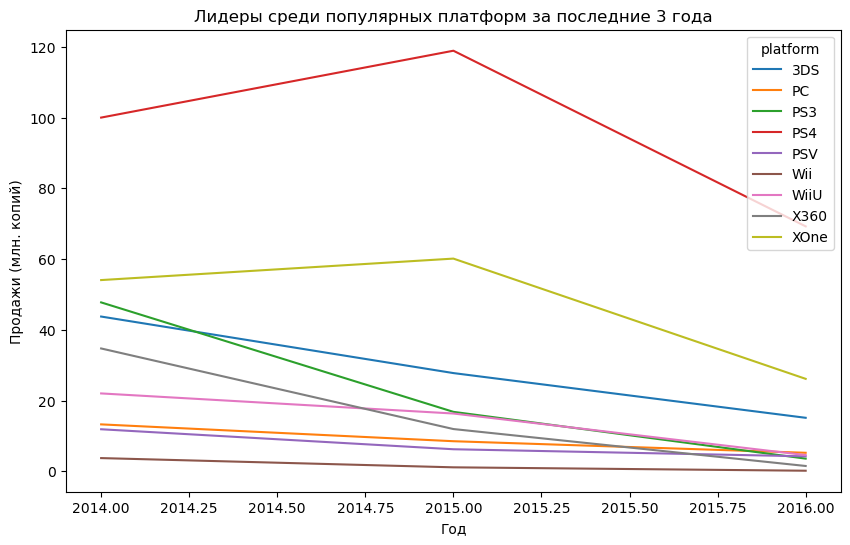

In [57]:
platform_trends = df[(df['platform'].isin(list_actual_platform)) & 
                     (df['year_of_release'] >= 2014)].pivot_table(
    index = ['platform','year_of_release'], 
    values = 'total_sales', 
    aggfunc = 'sum').reset_index()

graph_line(platform_trends, 'year_of_release', 'total_sales', 'Год',
           'Продажи (млн. копий)', 'Лидеры среди популярных платформ за последние 3 года')

**Промежуточный вывод:**

Для всех платформ виден рост, пик и спад продаж. Лидерами за последние 3 года были PlayStation4 и Xbox One - их пик пришелся на 2015 год. Также на этот период пришелся спад продаж приставки Nintendo 3DS. Самой невостребованной платформой оказалась Wii - ее изменения статично невелики

#### 'Ящик с усами' для глобальных продаж

**Комментарий:**

Убрала из условий для df actual_platform условие фильтрацию по платформам (` ``(df['platform'].isin(list_actual_platform)) & `` `)

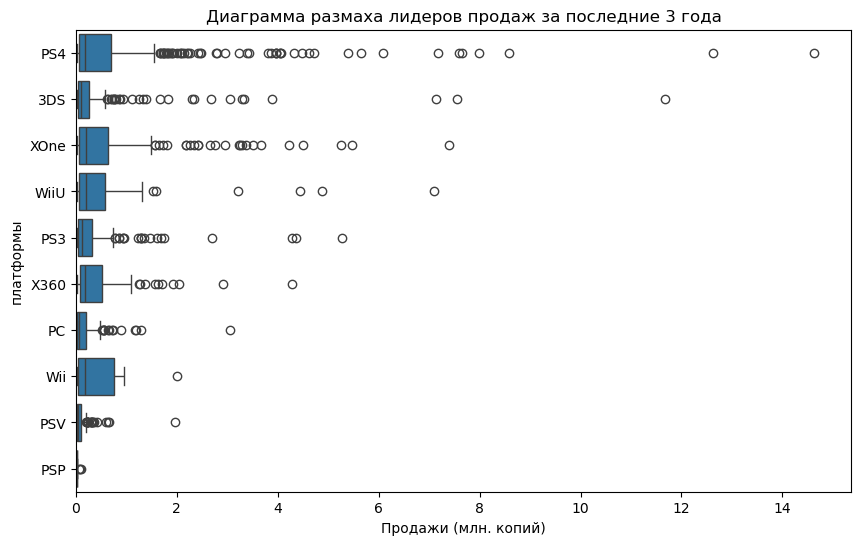

In [61]:
actual_platform = df[df['year_of_release'] >= 2014]

xlim = [0,None]
graph_box(actual_platform['total_sales'], actual_platform['platform'],
          'Продажи (млн. копий)', 'платформы', xlim, 'Диаграмма размаха лидеров продаж за последние 3 года')

**Промежуточный вывод:**

У каждых из приставок были игры-лидеры продаж - это выбросы на графике. У playSastion4 и Nintendo 3DS было больше всего игр, полузующиеся спросом и принесщие максимальное количество продаж.

#### Корреляция между отзывами и продажами

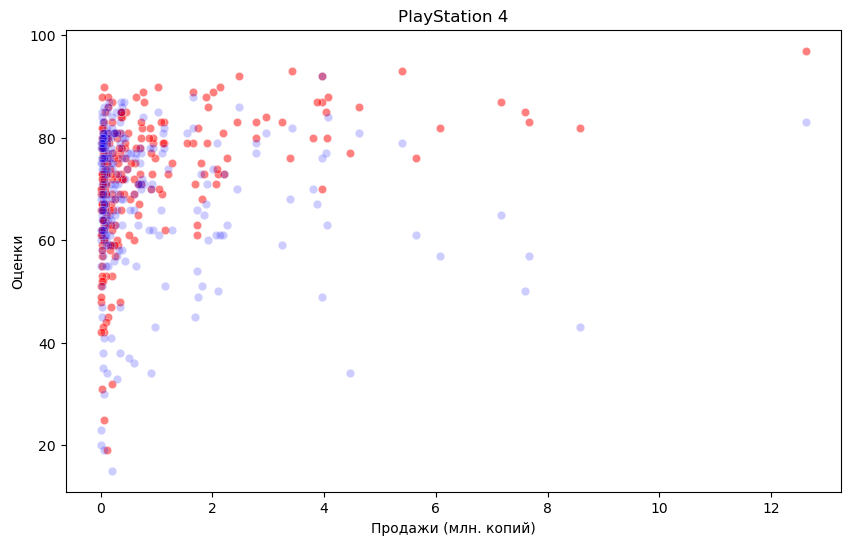

Корреляция продаж и оценки критиков для платформы "PlayStation 4": 0.403
Корреляция продаж и оценки пользователей для платформы "PlayStation 4": -0.04


In [64]:
platform_ps4 = actual_platform[(actual_platform['platform'] == 'PS4')]
graph_scatter(platform_ps4, 'PlayStation 4')

In [65]:
# код ревьюера

print(actual_platform[(actual_platform['platform'] == 'PS4') & (actual_platform['critic_score'] >= 0) & (actual_platform['user_score'] >= 0)].shape[0])
print(actual_platform[(actual_platform['platform'] == 'PS4') & (actual_platform['user_score'] >= 0)].shape[0])
print(actual_platform[(actual_platform['platform'] == 'PS4') & (actual_platform['critic_score'] >= 0)].shape[0])


234
242
237


**Комментарий 2:**

Да, заметила ошибку, что при использовании двух условий с оператором "И" много строк не учитывыается. Выше убрала заглушки и  удалила года с пропусками. Соответственно изменила условие выше

Значения изменились численно, но не сильно повлияли на результат

**Комментарий:** Добавила условие для оценок пользователей. В последующих графиках тоже

У PS4, Xbox появилась отрицательная корреляция, но это незначительна

*красные точки* - оценки критиков,

*синие точки* - оценки пользователей.

**Промежуточный вывод:**

Корреляция между продажами и оценками критиков положительна, следовательно, чем выше оценки критиков, тем больше продаж

А вот корреляции между продажами и оценками пользователей практически нет.

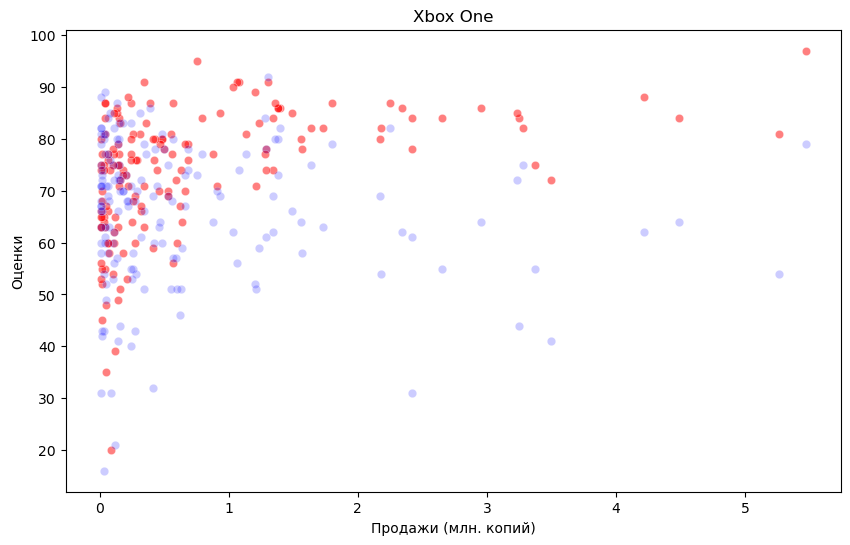

Корреляция продаж и оценки критиков для платформы "Xbox One": 0.429
Корреляция продаж и оценки пользователей для платформы "Xbox One": -0.07


In [69]:
platform_xone = actual_platform[(actual_platform['platform'] == 'XOne')]
graph_scatter(platform_xone, 'Xbox One')

**Промежуточеный вывод:**

Аналогичная ситуация и у Xbox.

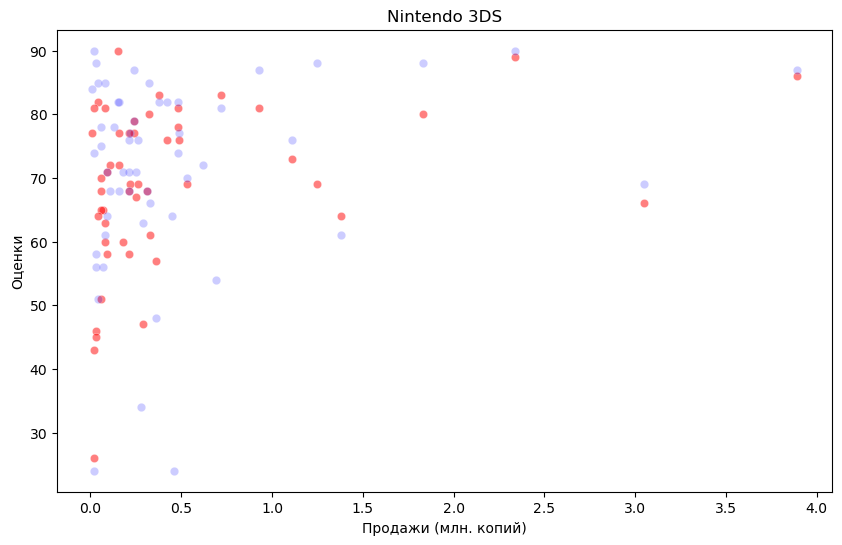

Корреляция продаж и оценки критиков для платформы "Nintendo 3DS": 0.314
Корреляция продаж и оценки пользователей для платформы "Nintendo 3DS": 0.215


In [71]:
platform_ps3 = actual_platform[(actual_platform['platform'] == '3DS')]
graph_scatter(platform_ps3, 'Nintendo 3DS')

**Промежуточный вывод:**

У Nintendo 3DS ситуация отличается. Если корреляция между продажами и оценками критиков такая же, то также есть и положительная корреляция продаж и оценок пользователей, что говорит о том, что оценки игроков благоприятно сказываются на продажах

#### Распределения по жанрам

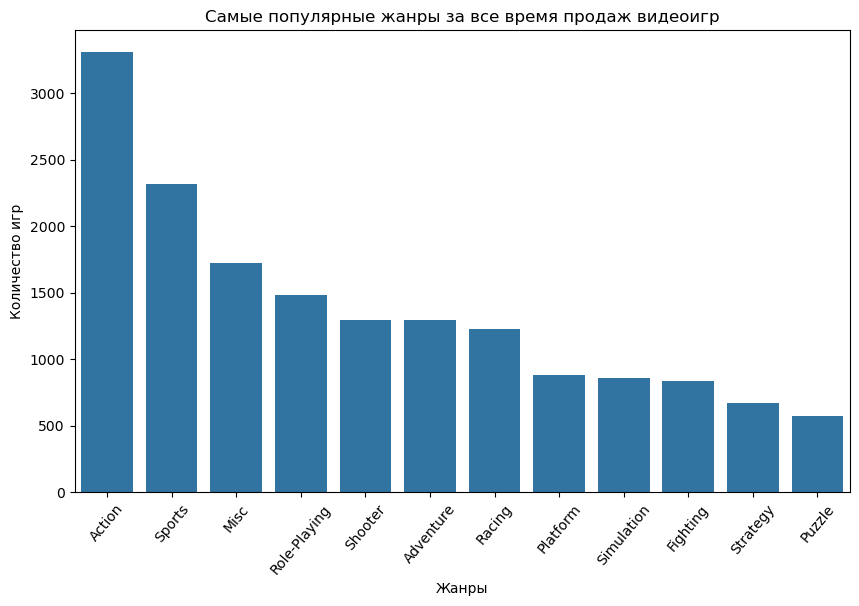

In [74]:
game_genre_count = df.pivot_table(index = 'genre', 
                                  values = 'name',
                                  aggfunc = 'count').sort_values('name', ascending = False)
graph_bar(game_genre_count, 'name', 'Жанры', 'Количество игр', 'Cамые популярные жанры за все время продаж видеоигр')

**Промежуточный вывод:**

Жанр Action является самым популярным в отличие от Puzzle

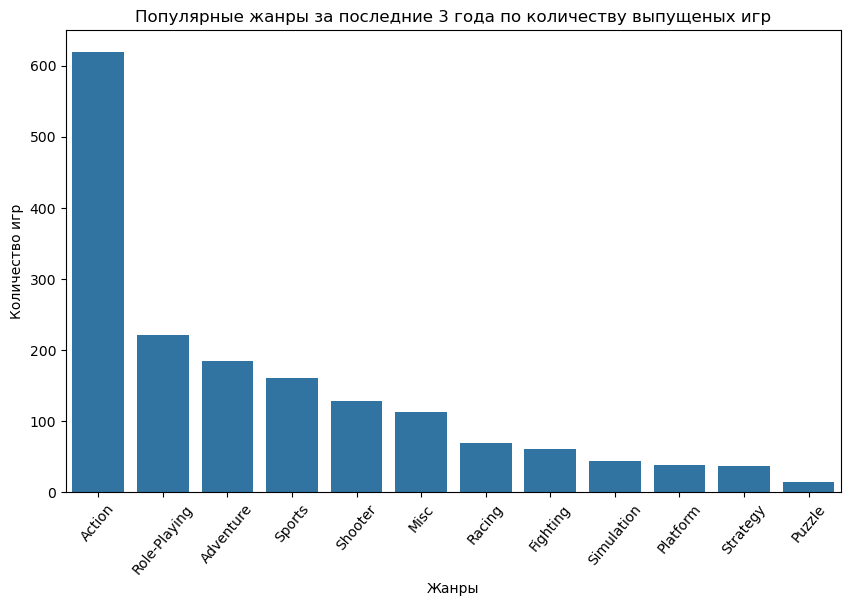

In [76]:
actual_game_genre_count = actual_platform.pivot_table(index = 'genre', 
                                                      values = 'name',
                                                      aggfunc = 'count').sort_values('name', ascending = False)
graph_bar(actual_game_genre_count, 'name', 'Жанры', 'Количество игр', 
          'Популярные жанры за последние 3 года по количеству выпущеных игр')

**Промежуточный вывод:**

За последние три года жанр Action сильно оторвался от остальных игровых жанров

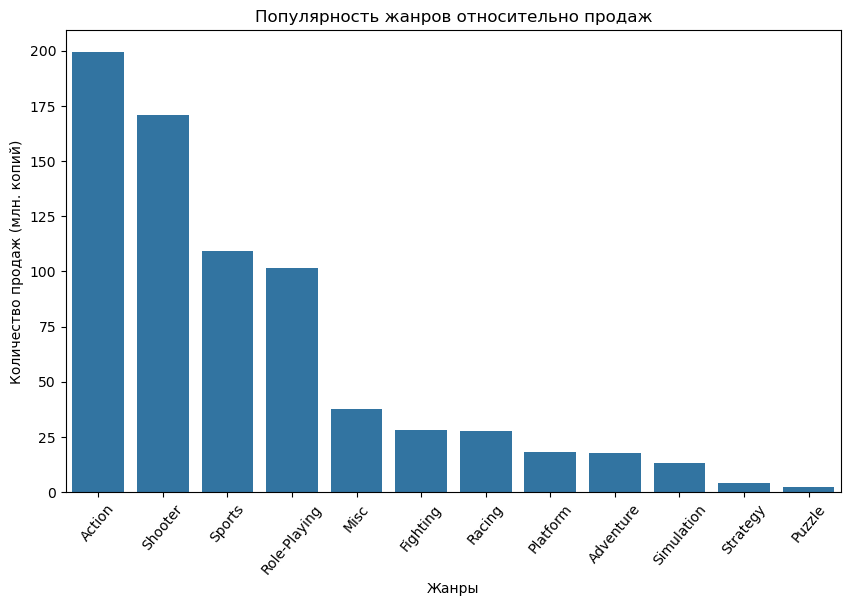

In [78]:
actual_game_genre_sales = actual_platform.pivot_table(index = 'genre', 
                                                      values = 'total_sales',
                                                      aggfunc = 'sum').sort_values('total_sales', ascending = False)
graph_bar(actual_game_genre_sales, 'total_sales', 'Жанры', 
          'Количество продаж (млн. копий)', 'Популярность жанров относительно продаж')

**Промежуточный вывод:**

По продажам также лидирует жанр Action. Наглядно видно, что спрос рождает предложение

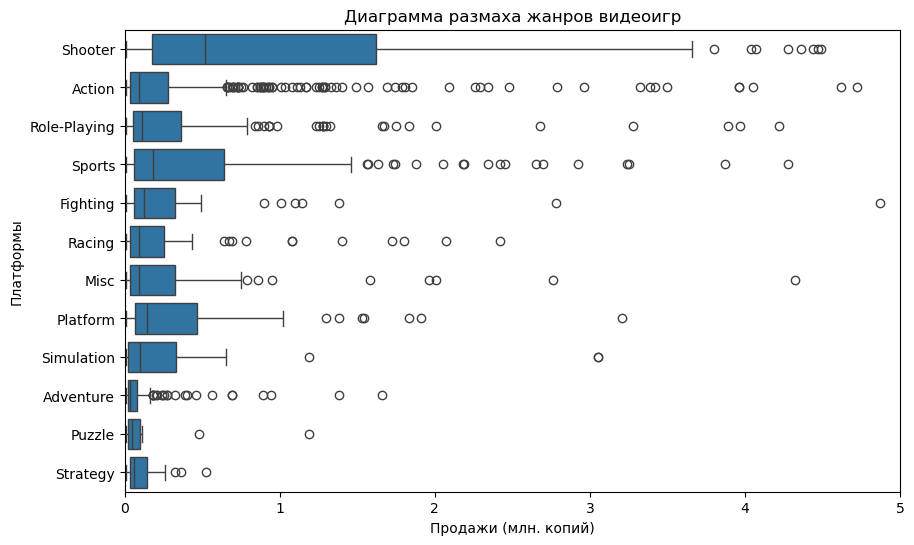

In [80]:
xlim = [0,5]
graph_box(actual_platform['total_sales'], actual_platform['genre'], 'Продажи (млн. копий)',
          'Платформы', xlim, 'Диаграмма размаха жанров видеоигр')

**Промежуточный вывод:**

Диаграмма размаха выглядит иначе: лидером среднего (межквартальный интервал) по количеству продаж является жанр Shooter и Sport. Можно сделать вывод, что игры в жанте Action лидитуют по количеству продаж из-за игр-хитов

### Шаг 4. Портрет пользователя каждого региона

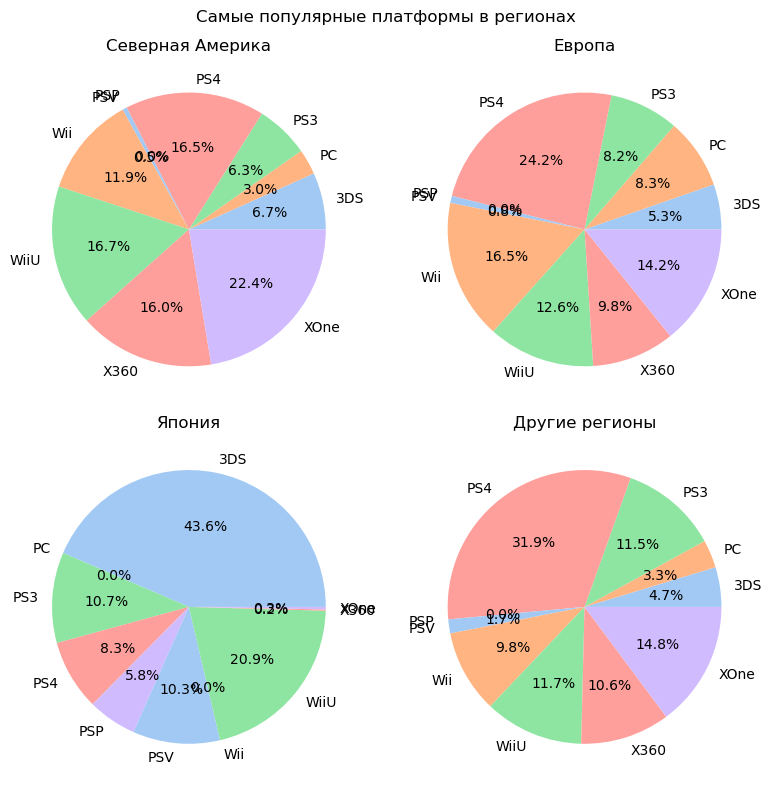

In [83]:
platform_region_sales=actual_platform.pivot_table(index='platform',
                                                  values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
graph_pie(platform_region_sales, 'Самые популярные платформы в регионах')

**Промежуточный вывод:**

В Северной Америке, Европе и других регионах в основном спрос на PlayStation4 и Xbox, в отличие от Японии, где самая популярная приставка Nintendo, при этом Xbox совершенно не пользуется спросом. 

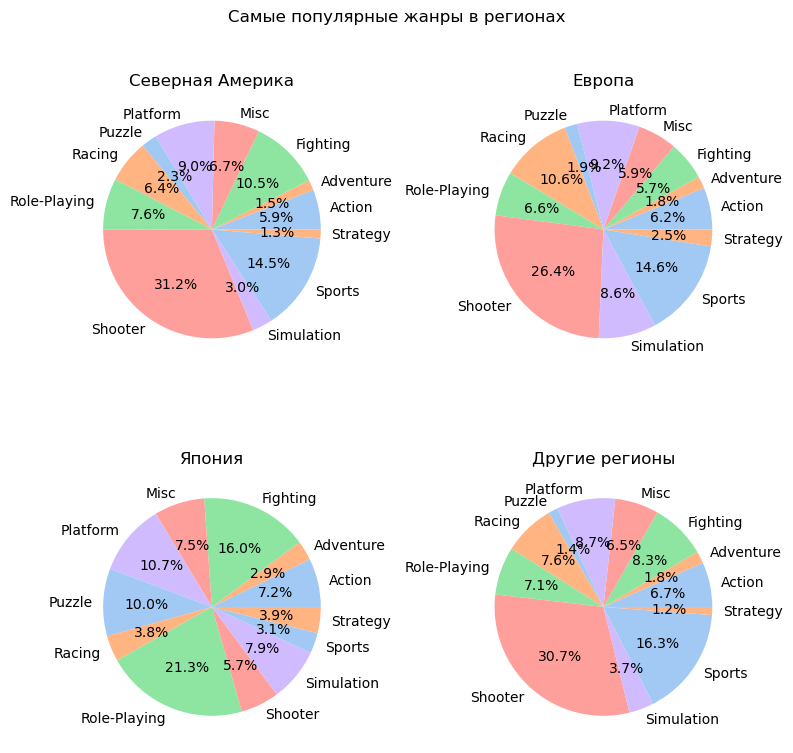

In [85]:
genre_region_sales=actual_platform.pivot_table(index='genre',
                                               values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
graph_pie(genre_region_sales, 'Самые популярные жанры в регионах')

**Промежуточный вывод:**

Аналогичная картина и с популярными жанрами. Все страны, кроме Японии, в основном предпочитают Shooter

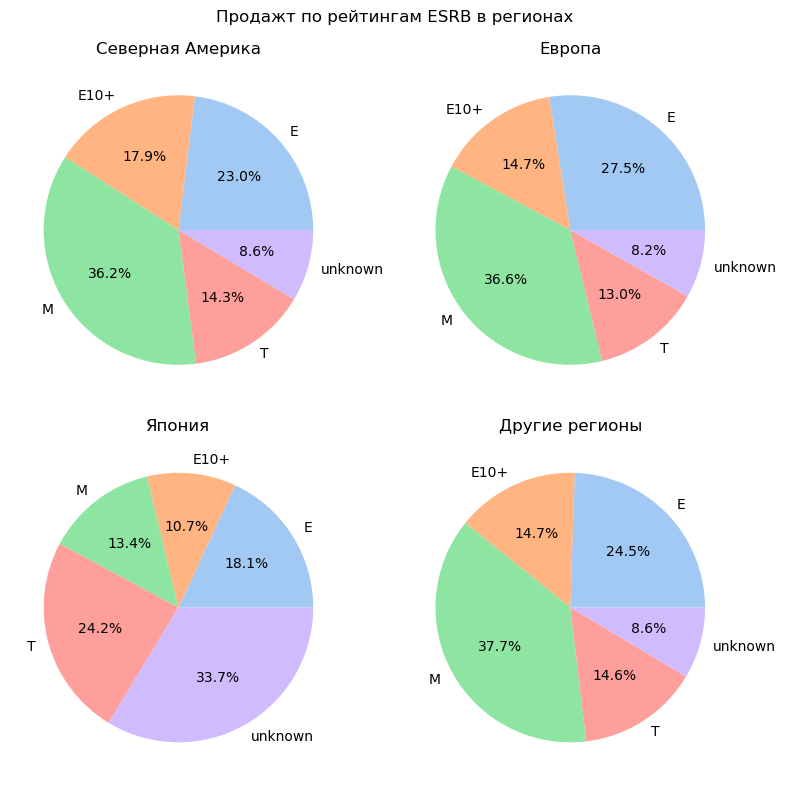

In [87]:
rating_region_sales=actual_platform.pivot_table(index='rating',
                                                values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
graph_pie(rating_region_sales, 'Продажт по рейтингам ESRB в регионах')

**Промежуточный вывод:**

Продажи по рейтингам игра у Северной Америки, Европы и в других регионах совпадают. Они чуть больше 35% и относятся к категории "М", то есть для взрослых. В Японии данный рейтинг меньше больше, чем в 2 раза, но имеет спрос рейтинг "Т", то есть для  подростков от 13 лет.

### Шаг 5. Проверка гипотез

#### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

*Нулевая гипотеза, Н0:* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

*Альтернативная гипотеза, Н1:* Средние пользовательские рейтинги платформ Xbox One и PC разные


Наши гипотезы относятся к двусторонней гипотезе, поэтому будем использовально t-test, чтобы отсечь "хвосты". При этом аздадим параметр equal_var=False, так как дисперсии генеральных совокупностей не равны. Уровень статистической значимости примем 0,05

**Комментарий**

Исправила альтернативную гипотезу, была опечатка(

In [92]:
user_score_pc = actual_platform[(actual_platform['platform'] == 'PC') & (actual_platform['user_score'] >= 0)]['user_score']
user_score_xone = actual_platform[(actual_platform['platform'] == 'XOne') & (actual_platform['user_score'] >= 0)]['user_score']

print('Количество значений выборки для платформы PC:', user_score_pc.shape[0])
print('Количество значений выборки для платформы Xbox One:', user_score_xone.shape[0])

alpha = 0.05

result = st.ttest_ind(user_score_pc, user_score_xone, equal_var = False)

print('Значение P-value ', round(result.pvalue, 6))

if result.pvalue < alpha:
    print('Отвергаем гипотезу H0, в пользу гипотезы H1')
else:
    print('Не можем отвергнуть гипотезу H0')
    
    
print('Средний рейтинг PC ', user_score_pc.mean())
print('Средний рейтинг Xbox ', user_score_xone.mean())

Количество значений выборки для платформы PC: 122
Количество значений выборки для платформы Xbox One: 165
Значение P-value  0.116014
Не можем отвергнуть гипотезу H0
Средний рейтинг PC  62.98360655737705
Средний рейтинг Xbox  65.94545454545455


**Комментарий:**

Для проверки гипотезы изменила целый df на actual_platform (в нем рассматриваются только актуальные года), также сделала проверку. Средние пользовательские рейтинги практически одинаковые

**Промежуточный вывод:**

С помощью проверки гипотезы мы не смогли опровергнуть Н0, то есть средние пользовательские рейтинги платформ одинаковые, так как вероятность этого меньше уровня значимости

#### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

*Нулевая гипотеза, Н0:*  Средние пользовательские рейтинги жанров Action и Sports равны

*Альтернативная гипотеза, Н1:* Средние пользовательские рейтинги жанров Action и Sports не равны

Данные гипотезы сформированы исходя из того, что для формирования нулевой гипотезы должен быть использован знак равенства. Остальные параметры задаем, аналогично

In [96]:
user_score_аction = actual_platform[(actual_platform['genre'] == 'Action') & (actual_platform['user_score'] >= 0)]['user_score']
user_score_sports = actual_platform[(actual_platform['genre'] == 'Sports') & (actual_platform['user_score'] >= 0)]['user_score']

print('Количество значений выборки для жанра Action:', user_score_аction.shape[0])
print('Количество значений выборки для жанра Sports:', user_score_sports.shape[0])

alpha = 0.05

result = st.ttest_ind(user_score_аction, user_score_sports, equal_var = False)

print('Значение P-value ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем гипотезу H0, в пользу гипотезы H1')
else:
    print('Не можем отвергнуть гипотезу H0')
    
    
print('Средний пользовательский рейтинг action: ', user_score_аction.mean())
print('Средний пользовательский рейтинг sports: ', user_score_sports.mean())

Количество значений выборки для жанра Action: 297
Количество значений выборки для жанра Sports: 127
Значение P-value  1.182555038264477e-14
Отвергаем гипотезу H0, в пользу гипотезы H1
Средний пользовательский рейтинг action:  67.60606060606061
Средний пользовательский рейтинг sports:  52.25196850393701


**Комментарий:**

Актуальный период задала, значения-заглушки исключила, указав, значения больше нуля, убрала округление p-value, также провела проверку

Можно сделать следующий вывод, что средний рейтинг по жанрам отличается - это подтвердила проверки, выдав средний пользовательский рейтинг по двум жанрам.


**Промежуточный вывод:**

Мы отвергаем гипотезу о том, что средние пользовательских оценок для жанров Action и Sports одинаковы, потому что вероятность этого меньше уровня значимости. Соответственно, подтверждаем альтернативную теорию - средние пользовательских оценок для жанров Action и Sports в генеральной совокупности разные.

### Шаг 6. Общий вывод

В результате проведенного исследования можно сделать следующие выводы:

* с 1994 года на рынке игр, с появлением PlayStation1, начался заметный рост. Второй взлет пришелся на 2001-2002, когда появилась PlayStation2. Пик продаж пришелся на 2008 и 2009 года. Поэсле этого начался спад, скорее всего, вызванный телефонами и планшетами.
* Очевидными лидерами платформ в Японии (главным разработчиком приставок) является Nintendo 3DS, при этом в Америке, Европе и других странах это PlayStation4, Wii, XboxOne.
* В среднем актуальность каждой приставки длится около 10 лет.
* Больше всего суммарные продажи и количество продаж у жанра Action, меньше у Puzzle. Но наибольшее среднее по продажам у жанра Shooter

Проверили гипотезы:

* В результате проверки отвергли гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Так же отвергли гипотезу о том, что средние пользовательских оценок для жанров Action и Sports одинаковы в пользу гипотезы, что они разные.

Рекомендация для бизнеса:

Продавать игры на PS4 в жанре Shooter с рейтингом "17+" для Европы и Северной Америки. Для Японии продавать игры на 3DS в жанре Role-playind, Action с рейтингом "детские"
